<a href="https://colab.research.google.com/github/AlizaKunvar/RhombixTechnology_Task2/blob/main/Twitter_Sentiment_Analysis_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [6]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/AlizaKunvar/RhombixTechnology_Task2/main/Tweets.csv.zip")
df = df[["text", "airline_sentiment"]]
df = df.rename(columns={"text": "Tweet", "airline_sentiment": "Sentiment"})
df.head()

,Tweet,Sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [4]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_tweet(tweet):
    tweet = re.sub(r'@\w+', '', tweet)
    tweet = re.sub(r'http\S+', '', tweet)
    tweet = re.sub(r'#\w+', '', tweet)
    tweet = re.sub(r'[^a-zA-Z\s]', '', tweet)
    tweet = tweet.lower()
    words = tweet.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)

df["Cleaned_Tweet"] = df["Tweet"].apply(clean_tweet)
df.head()

,Tweet,Sentiment,Cleaned_Tweet
0,@VirginAmerica What @dhepburn said.,neutral,said
1,@VirginAmerica plus you've added commercials t...,positive,plus youve added commercial experience tacky
2,@VirginAmerica I didn't today... Must mean I n...,neutral,didnt today must mean need take another trip
3,@VirginAmerica it's really aggressive to blast...,negative,really aggressive blast obnoxious entertainmen...
4,@VirginAmerica and it's a really big bad thing...,negative,really big bad thing


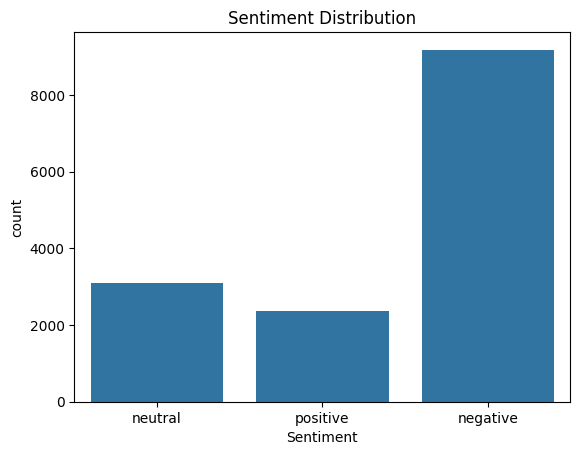

In [5]:
sns.countplot(x="Sentiment", data=df)
plt.title("Sentiment Distribution")
plt.show()

In [6]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df["Cleaned_Tweet"]).toarray()
y = df["Sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [8]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7329234972677595

Classification Report:
               precision    recall  f1-score   support

    negative       0.72      0.98      0.83      1889
     neutral       0.71      0.23      0.35       580
    positive       0.86      0.36      0.51       459

    accuracy                           0.73      2928
   macro avg       0.77      0.52      0.56      2928
weighted avg       0.74      0.73      0.68      2928



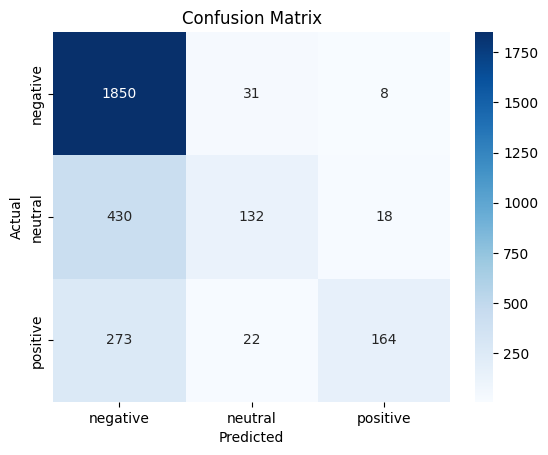

In [9]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [10]:
def predict_sentiment(tweet):
    cleaned = clean_tweet(tweet)
    vector = tfidf.transform([cleaned]).toarray()
    return model.predict(vector)[0]

# Testing
predict_sentiment("I love this airline service!")
predict_sentiment("Flight delayed. Worst experience ever.")

np.str_('negative')

In [11]:
# Trying Logistic Regression model to improve accuracy
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))
print(classification_report(y_test, lr_preds))

Logistic Regression Accuracy: 0.7950819672131147
              precision    recall  f1-score   support

    negative       0.82      0.94      0.87      1889
     neutral       0.65      0.48      0.56       580
    positive       0.82      0.60      0.69       459

    accuracy                           0.80      2928
   macro avg       0.76      0.67      0.71      2928
weighted avg       0.79      0.80      0.78      2928



In [12]:
# Trying Support Vector Machine (SVM) model
from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_preds))
print(classification_report(y_test, svm_preds))

SVM Accuracy: 0.7967896174863388
              precision    recall  f1-score   support

    negative       0.85      0.91      0.88      1889
     neutral       0.62      0.53      0.57       580
    positive       0.74      0.69      0.71       459

    accuracy                           0.80      2928
   macro avg       0.74      0.71      0.72      2928
weighted avg       0.79      0.80      0.79      2928



In [14]:
# Trying XGBoost model with label encoding
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Encode labels to numeric
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

# Train the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train_enc)

# Predict and decode
xgb_preds = xgb_model.predict(X_test)
xgb_preds_labels = label_encoder.inverse_transform(xgb_preds)

# Evaluate
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_preds_labels))
print(classification_report(y_test, xgb_preds_labels))


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:15:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.7622950819672131
              precision    recall  f1-score   support

    negative       0.77      0.95      0.85      1889
     neutral       0.67      0.31      0.42       580
    positive       0.75      0.58      0.66       459

    accuracy                           0.76      2928
   macro avg       0.73      0.61      0.64      2928
weighted avg       0.75      0.76      0.74      2928



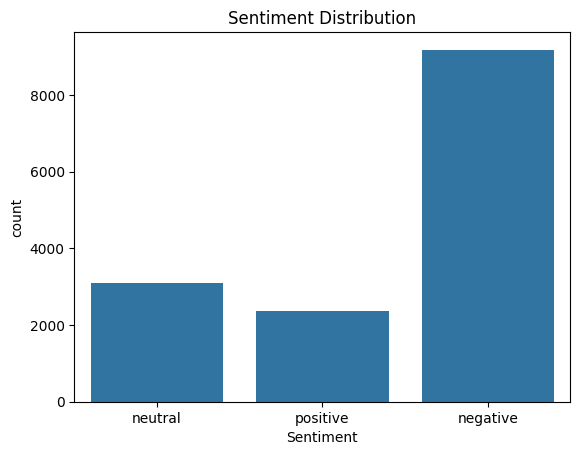

In [15]:
# Visualize sentiment distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df['Sentiment'])
plt.title('Sentiment Distribution')
plt.show()